# **Pulling out full clinic data file**

In [1]:
# path of the file
myfile=r'C:/2. Spring 2023/Python/Full CLinic Data/'

In [10]:
# import pandas
import pandas as pd

# read excell file using pandas
clinic = pd.read_excel(myfile +'ARTClinic_All.xlsx')
list(clinic)

['ClinicID',
 'Address',
 'Long',
 ' Lat',
 'State Code',
 'County Code',
 'Tract Code']

# **1) Checking whether there is any null value/missing data and any discrepencies in the data**

In [11]:
# data overview

clinic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ClinicID     447 non-null    int64  
 1   Address      447 non-null    object 
 2   Long         447 non-null    float64
 3    Lat         447 non-null    float64
 4   State Code   447 non-null    int64  
 5   County Code  447 non-null    int64  
 6   Tract Code   447 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 24.6+ KB


In [12]:
clinic.head(71)

,ClinicID,Address,Long,Lat,State Code,County Code,Tract Code
0,551,"12000 Elm Creek Blvd North, MAPLE GROVE, MN, ...",45.095698,-93.433184,27,27053,26710
1,446,"2101 Woodwinds Dr, WOODBURY, MN, 55125",44.917735,-92.979869,27,27163,71001
2,78,"3551 Roger Brooke Dr, LACKLAND AFB, TX, 78234",29.460469,-98.415713,48,48029,120100
3,521,"1 Daniel Burnham Ct, SAN FRANCISCO, CA, 94109",37.786755,-122.422491,6,6075,15100
4,560,"1 JARRETT WHITE RD, TRIPLER AMC, HI, 96859",-157.893970,21.356024,15,3,6701
...,...,...,...,...,...,...,...
66,508,"1245 Highland Ave, ABINGTON, PA, 19001",40.120634,-75.119100,42,42091,201607
67,520,"12611 World Plaza Ln, FORT MYERS, FL, 33907",26.559693,-81.877779,12,12071,1703
68,26,"127 CASA ST, SAN LUIS OBISPO, CA, 93405",-120.664720,35.292038,6,79,10902
69,362,"1275 SUMMER ST, STAMFORD, CT, 06905",-73.541730,41.061985,9,1,21600


In [13]:
#Column Selection
clinic['Long']

0       45.095698
1       44.917735
2       29.460469
3       37.786755
4     -157.893970
          ...    
442   -121.803795
443     32.885163
444     26.530021
445   -118.376250
446     43.140073
Name: Long, Length: 447, dtype: float64

In [17]:
clinic[' Lat']

0      -93.433184
1      -92.979869
2      -98.415713
3     -122.422491
4       21.356024
          ...    
442     36.571550
443   -117.225103
444    -80.204476
445     34.067257
446    -88.070564
Name:  Lat, Length: 447, dtype: float64

In [14]:
clinic['State Code']

0      27
1      27
2      48
3       6
4      15
       ..
442     6
443     6
444    12
445     6
446    55
Name: State Code, Length: 447, dtype: int64

In [15]:
clinic['Address']

0       12000 Elm Creek Blvd North, MAPLE GROVE, MN, ...
1                 2101 Woodwinds Dr, WOODBURY, MN, 55125
2          3551 Roger Brooke Dr, LACKLAND AFB, TX, 78234
3          1 Daniel Burnham Ct, SAN FRANCISCO, CA, 94109
4             1 JARRETT WHITE RD, TRIPLER AMC, HI, 96859
                             ...                        
442           9833 BLUE LARKSPUR LN, MONTEREY, CA, 93940
443                9850 Genesee Ave, LA JOLLA, CA, 92037
444         9868 S. State Rd 7, BOYNTON BEACH, FL, 33472
445       99 N LA CIENEGA BLVD, BEVERLY HILLS, CA, 90211
446       W129 N0755 Northfield Dr, MILWAUKEE, WI, 53051
Name: Address, Length: 447, dtype: object

**Findings: No null/missing values. But there are discrepencies in the latitudes and longitudes (Flipped).**

# Fixing the Problem of the Fipped Lat & Long

In [21]:
myfile=r'C:/2. Spring 2023/Python/Full CLinic Data/'
clinic = pd.read_excel(myfile + 'ARTClinic_All.xlsx')

# Check if latitude and longitude are flipped
flip_mask = clinic['Long'] > clinic[' Lat']

# Swap latitude and longitude values where they are flipped
clinic.loc[flip_mask, ['Long', ' Lat']] = clinic.loc[flip_mask, [' Lat', 'Long']].values

# Write the updated dataframe to a new Excel file
clinic.to_excel('Downloads/fixed_file_all_clinic.xlsx', index=False)

In [23]:
newfile=r'C:/2. Spring 2023/Python/Full CLinic Data/'
cor_clinic = pd.read_excel(newfile + 'fixed_file_all_clinic.xlsx')
cor_clinic.head(71)

,ClinicID,Address,Long,Lat,State Code,County Code,Tract Code
0,551,"12000 Elm Creek Blvd North, MAPLE GROVE, MN, ...",-93.433184,45.095698,27,27053,26710
1,446,"2101 Woodwinds Dr, WOODBURY, MN, 55125",-92.979869,44.917735,27,27163,71001
2,78,"3551 Roger Brooke Dr, LACKLAND AFB, TX, 78234",-98.415713,29.460469,48,48029,120100
3,521,"1 Daniel Burnham Ct, SAN FRANCISCO, CA, 94109",-122.422491,37.786755,6,6075,15100
4,560,"1 JARRETT WHITE RD, TRIPLER AMC, HI, 96859",-157.893970,21.356024,15,3,6701
...,...,...,...,...,...,...,...
66,508,"1245 Highland Ave, ABINGTON, PA, 19001",-75.119100,40.120634,42,42091,201607
67,520,"12611 World Plaza Ln, FORT MYERS, FL, 33907",-81.877779,26.559693,12,12071,1703
68,26,"127 CASA ST, SAN LUIS OBISPO, CA, 93405",-120.664720,35.292038,6,79,10902
69,362,"1275 SUMMER ST, STAMFORD, CT, 06905",-73.541730,41.061985,9,1,21600


# **2) Checking the DUPLICATION**

In [24]:
cor_clinic['Address'].value_counts()

 12000 Elm Creek Blvd North, MAPLE GROVE, MN, 55369    1
468 E MARKET ST, AKRON, OH, 44304                      1
5 COLUMBUS CIR, NEW YORK, NY, 10019                    1
499 ILLINOIS ST, SAN FRANCISCO, CA, 94158              1
4980 Barranca Pkwy, IRVINE, CA, 92604                  1
                                                      ..
2 Tampa General Cir, TAMPA, FL, 33606                  1
2 PRINCESS RD, LAWRENCEVILLE, NJ, 08648                1
2 MAIN ST, STONEHAM, MA, 02180                         1
2 BATTERSON PARK RD, FARMINGTON, CT, 06032             1
W129 N0755 Northfield Dr, MILWAUKEE, WI, 53051         1
Name: Address, Length: 447, dtype: int64

In [27]:
cor_clinic['Long'].value_counts()

-111.876050    2
-93.433184     1
-85.567332     1
-122.387985    1
-117.794023    1
              ..
-82.459182     1
-74.714325     1
-71.101295     1
-72.799960     1
-88.070564     1
Name: Long, Length: 446, dtype: int64

In [28]:
cor_clinic[' Lat'].value_counts()

33.045130    2
45.095698    1
38.310470    1
37.765130    1
33.675777    1
            ..
27.937082    1
40.283615    1
42.501324    1
41.706480    1
43.140073    1
Name:  Lat, Length: 446, dtype: int64

**Findings: We have same longitude and latitude with different clinic ID (296 & 7) and different adress (in row 442 & 443) in the dataset. I am not deleting it.**

# **3) Checking some statistics of the data**

In [29]:
cor_clinic['Long'].mean()

-93.36467387248322

In [30]:
cor_clinic['Long'].median()

-87.899475

In [31]:
cor_clinic['Long'].mode()

0   -111.87605
Name: Long, dtype: float64

In [32]:
cor_clinic['Long'].std()

17.973090179581884

In [33]:
cor_clinic[' Lat'].mean()

37.20131134675614

In [34]:
cor_clinic[' Lat'].median()

38.566233

In [35]:
cor_clinic[' Lat'].mode()

0    33.04513
Name:  Lat, dtype: float64

In [36]:
cor_clinic[' Lat'].std()

5.1214126979645025

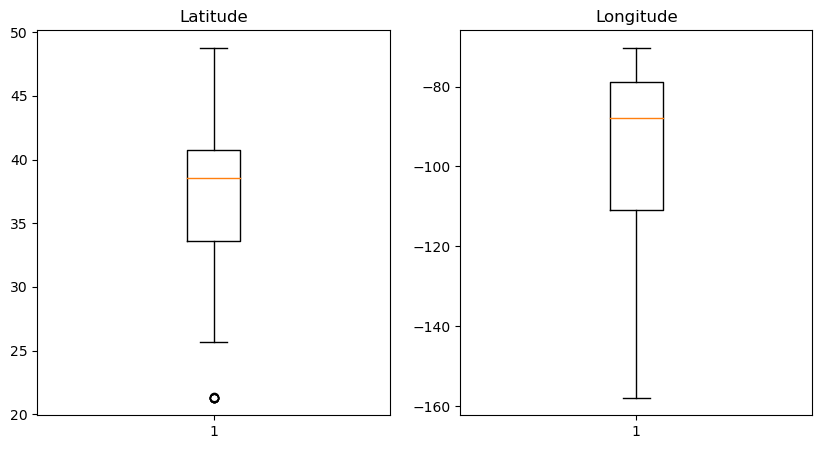

In [43]:
#Plotting the data in boxplot

import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
axs[0].boxplot(cor_clinic[' Lat'])
axs[0].set_title('Latitude')
axs[1].boxplot(cor_clinic['Long'])
axs[1].set_title('Longitude')
plt.show()

**Findings: Data are non-parametric, as mean, median, mode are different.**

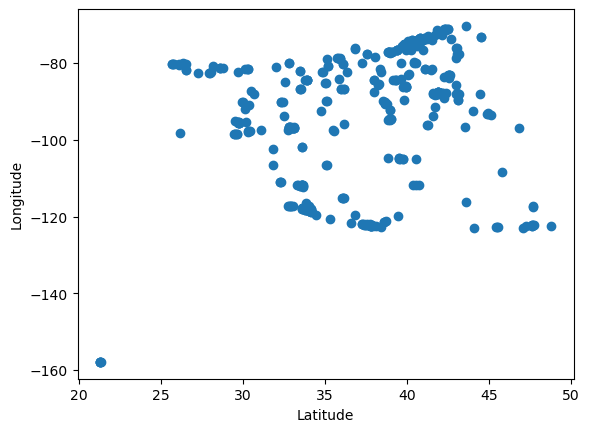

In [38]:
#creating a scatterplot to double check the resuslts above

plt.scatter(cor_clinic[' Lat'], cor_clinic['Long'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

**So, the clinics are contencentrated within USA.**

# 4) Checking data consistency using the apply() function

In [40]:
def check_data(row):
    if row[' Lat'] > row['Long']:
        return 'Error'
    else:
        return 'OK'

cor_clinic['data_check'] = cor_clinic.apply(check_data, axis=1)
print(cor_clinic)

     ClinicID                                            Address        Long  \
0         551   12000 Elm Creek Blvd North, MAPLE GROVE, MN, ...  -93.433184   
1         446             2101 Woodwinds Dr, WOODBURY, MN, 55125  -92.979869   
2          78      3551 Roger Brooke Dr, LACKLAND AFB, TX, 78234  -98.415713   
3         521      1 Daniel Burnham Ct, SAN FRANCISCO, CA, 94109 -122.422491   
4         560         1 JARRETT WHITE RD, TRIPLER AMC, HI, 96859 -157.893970   
..        ...                                                ...         ...   
442       539         9833 BLUE LARKSPUR LN, MONTEREY, CA, 93940 -121.803795   
443       462              9850 Genesee Ave, LA JOLLA, CA, 92037 -117.225103   
444       413       9868 S. State Rd 7, BOYNTON BEACH, FL, 33472  -80.204476   
445       115     99 N LA CIENEGA BLVD, BEVERLY HILLS, CA, 90211 -118.376250   
446       236     W129 N0755 Northfield Dr, MILWAUKEE, WI, 53051  -88.070564   

           Lat  State Code  County Code

**Here, the county codes or tract code might be incorrect.**

# All of the previous codes ran smoothly with the new longer dataset. I have fixed the flipped problem. But confused about fixing the county/tract code. May be two groups worked on this problem with the previous clinic file.

# 5) Geocoding the Clinic Addresses

In [51]:
import pandas as pd
import folium
from geopy.geocoders import ArcGIS

# Read the Excel file into a pandas DataFrame

df = pd.read_excel('C:/2. Spring 2023/Python/Full CLinic Data/fixed_file_all_clinic.xlsx')

# Extract the address column as a list
addresses = df['Address'].tolist()

# Empty list to store geocoded coordinates
coords = []

# Create an instance of the ArcGIS geocoder
geolocator = ArcGIS()

# Loop through each address and geocode it
for address in addresses:
    location = geolocator.geocode(address)
    if location is not None:
        coords.append((location.latitude, location.longitude))

# Create a map centered at the first geocoded address
m = folium.Map(location=coords[0], zoom_start=10)

# Add a marker for each geocoded address
for coord in coords:
    folium.Marker(location=coord).add_to(m)

# Display the map
m

# So, the full dataset seems good to go! Thanks Professor, for creating this opportunity for us to explore with real dataset!